This notebook will take a look on all three, now on the merged dataset and looking for research-question specific correlations.

In [1]:
# importing basic eda tools
import pandas as pd
import numpy as np
import json
import matplotlib as mp

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#time and warnings
import time
import warnings

#settings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set_context('poster', font_scale=0.5)

In [2]:
#read in final_clean.csv (see JB_giga_merge)
complete = pd.read_csv('final_clean.csv')

In [ ]:
complete.sample(10)

In [ ]:
complete.shape

In [ ]:
complete.columns

In [ ]:
print('Total number of reviews: ', len(complete))
print('Positive reviews: ', len(complete[complete['stars_x'] >= 4]))
print('Neutral reviews: ', len(complete[complete['stars_x'] == 3]))
print('Negative reviews: ', len(complete[complete['stars_x'] <= 2]))
print('Useful reviews: ', len(complete[complete['useful_x'] > 0]))
print('Cool reviews: ', len(complete[complete['cool_x'] > 0]))
print('Funny reviews: ', len(complete[complete['funny_x'] > 0]))

In [2]:
#creating dataframes, based on converted .json-files - see 'jw_importing_full_review.ipynb' 

review =    pd.read_csv('/Volumes/Samsung_T5/Data_Science_BootCamp/capstone/Yelp-Capstone/data/review_1819.csv')
#business =  pd.read_csv('/Volumes/Samsung_T5/Data_Science_BootCamp/capstone/Yelp-Capstone/data/business.csv')
#users =     pd.read_csv('/Volumes/Samsung_T5/Data_Science_BootCamp/capstone/Yelp-Capstone/data/users.csv')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
business.columns

Index(['Unnamed: 0', 'business_id', 'name', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars', 'review_count',
       'is_open', 'attributes', 'categories', 'hours'],
      dtype='object')

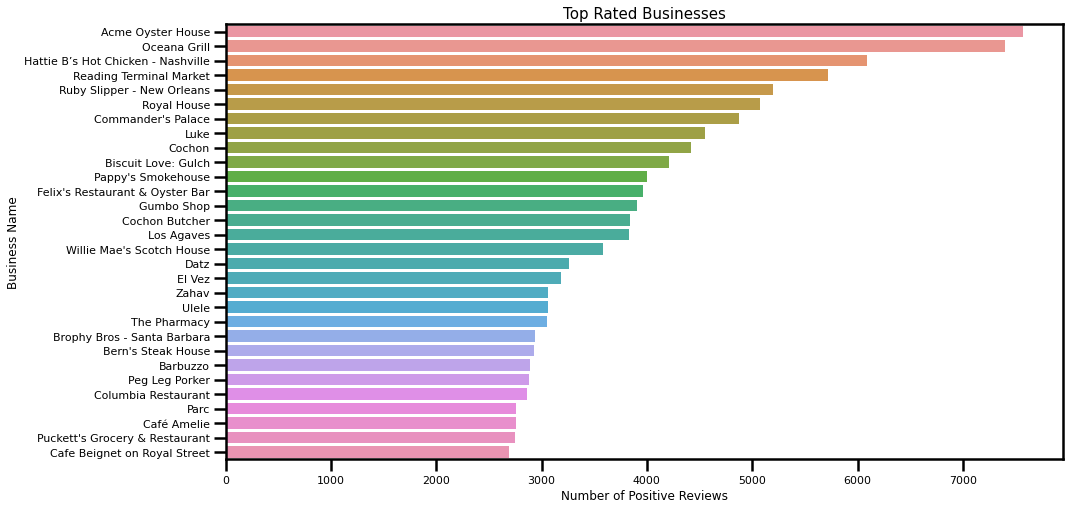

In [8]:
#creating a new dataframe that contains top 30 rated business sorted by the number of positive reviews
biz_good_rating = business[(business['stars'] >= 4) & (business['review_count'] > 300)]
top_rated = biz_good_rating[['name', 
                             'review_count', 
                             'stars',
                            'categories']].sort_values(by='review_count', ascending=False)[:30]

#plotting the top 30 businesses
plt.figure(figsize=(15,8))
sns.barplot(data = top_rated, x = 'review_count', y = 'name')
plt.ylabel('Business Name', fontsize=12)
plt.xlabel('Number of Positive Reviews', fontsize=12)
plt.title('Top Rated Businesses', fontsize=15)
plt.show();




In [10]:
# Which Categories are getting top reviews?

#separating values in categories and saving it to a list, and removing leading and trailing white space
cat_top_rated_list = top_rated.categories.str.split(';').sum()
cat_top_rated_list = [x.strip() for x in cat_top_rated_list]

#converting given values to a dictionary
cat_top_rated_dict = {}
for c in range(len(cat_top_rated_list)):
    cat_top_rated_dict[cat_top_rated_list[c]] = cat_top_rated_list.count(cat_top_rated_list[c])

#converting the given dictionary to a DataFrame with categories of top reviewed businesses
cat_top_rated = pd.DataFrame.from_dict(data = cat_top_rated_dict,orient="index")
cat_top_rated.reset_index(inplace = True)
cat_top_rated.columns = ['category', 'occurance']

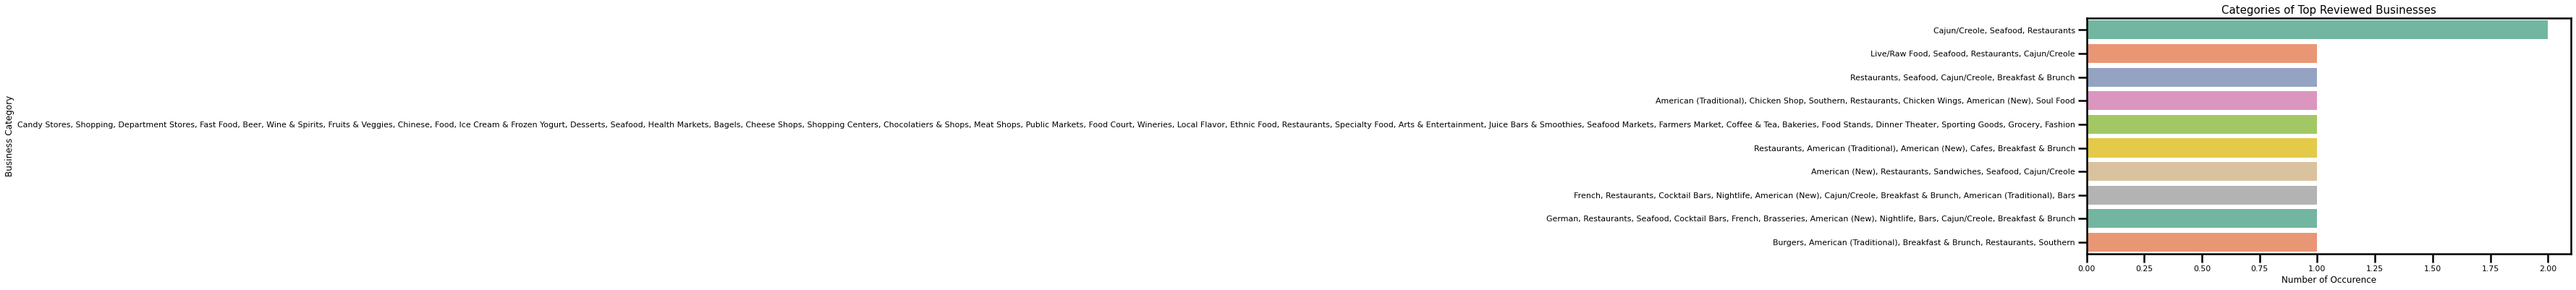

In [11]:
#visualizing the share of each category present in the top 30 reviewed businesses
size = cat_top_rated.nlargest(10,'occurance')['occurance']
label = cat_top_rated.nlargest(10,'occurance')['category']

plt.figure(figsize=(12,6))
sns.barplot(data = cat_top_rated, x = size, y = label, palette = 'Set2')
plt.ylabel('Business Category', fontsize=12)
plt.xlabel('Number of Occurence', fontsize=12)
plt.title('Categories of Top Reviewed Businesses', fontsize=15)
plt.show();

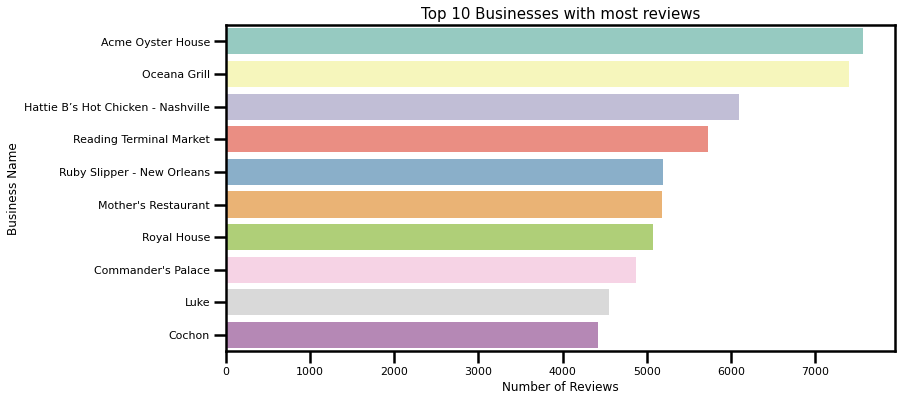

In [15]:
#visualizing top 10 businesses with most rewiews
most_reviewed = business[['name', 
                        'review_count']].reset_index().sort_values(by='review_count', 
                                                                            ascending=False)[:10]

plt.figure(figsize=(12,6))
sns.barplot(data = most_reviewed, x = 'review_count', y = 'name', palette = 'Set3')
plt.ylabel('Business Name', fontsize=12)
plt.xlabel('Number of Reviews', fontsize=12)
plt.title('Top 10 Businesses with most reviews', fontsize=15)
plt.show();

In [4]:
review.columns

Index(['Unnamed: 0', 'review_id', 'user_id', 'business_id', 'stars', 'useful',
       'funny', 'cool', 'text', 'date', 'year'],
      dtype='object')

In [3]:
complete.columns

Index(['Unnamed: 0', 'review_id', 'user_id', 'business_id', 'stars_x',
       'useful_x', 'funny_x', 'cool_x', 'text', 'date', 'year', 'Unnamed: 0_y',
       'name_x', 'address', 'city', 'state', 'postal_code', 'latitude',
       'longitude', 'stars_y', 'review_count_x', 'is_open', 'attributes',
       'categories', 'hours', 'Unnamed: 0.1', 'name_y', 'review_count_y',
       'yelping_since', 'useful_y', 'funny_y', 'cool_y', 'elite', 'friends',
       'fans', 'average_stars'],
      dtype='object')

What are the most common words in bad reviews?

In [5]:
#creating a dataframe with only 1-star reviews
bad_words_cond = complete[complete['stars_x'] == 1]
bad_words = bad_words_cond[['name_x',
                            'stars_x', 
                            'text', 
                            'categories']].reset_index().drop(columns='index')

In [6]:
print('Shape of the dataframe: ', bad_words.shape)

Shape of the dataframe:  (246095, 4)


In [7]:
#!pip install spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 25.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 783.1/783.1 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.9/107.9 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.1/460.1 kB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 39.0 MB/s eta 0:00:0000:0100:01


In [ ]:
%%time

#loading in the language model
nlp = spacy.load('en_core_web_sm')

#initializing doc object
doc = list(nlp.pipe(bad_words.text))

In [ ]:
#!pip install wordcloud

Looking at WordClouds, mainly for visuals, inspired by JW!

In [8]:
import sys
# adding to the path variables the one folder higher (locally, not changing system variables)
sys.path.append("..")

# importing all needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nltk

from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

import time
from tqdm import tqdm

# ignore the warnings
import warnings
warnings.filterwarnings("ignore")

# set Randomseed
RSEED = 42

# import needed functions
#from modeling.preprocessing import *


https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a



In [ ]:
#import nltk
#nltk.download()

In [ ]:
# initialize the stopword list:
stopwords = nltk.corpus.stopwords.words('english')

# update the stopwords after generating the first few clouds with non decisive words
additional_stopwords = ['one', 'go', 'also', 'would', 'get', 'got']
stopwords.extend(additional_stopwords)

# create a wordcloud using all the text in text
text = " ".join(text for text in complete.text)

#remove the stopwords from the text
wordcloud = WordCloud(stopwords=stopwords).generate(text)